# this notebook is for Week4-Assignment-Part 2 Waters&Ions Analysis
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# Assignment: g) In a jupyter notebook, compute the mean squared displacement for the Water Oxygens, the Sodium, and the Oxygen using mdtraj or MDAnalysis [you don't have to wait for the simulation to finish to start working on this]
# h) Plot the MSD vs time of all 3 on the same plot in a jupyter notebook in the Analysis folder, and save in the Figures folder

In [1]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the trajectory
xtc_file='../Data/Water-Ions_unwrapped.xtc'
gro_file='../Data/Water-Ions_unwrapped.gro'
traj=md.load(xtc_file,top=gro_file)
# check the simulation time in ns & the number of frames
print('The simulation time is',traj.time[-1]/1000,'ns')
print('The number of frames is',traj.n_frames)
# check topology 
print(traj.topology)
# check the number of all atoms using the topology selection
print('\nThe number of all atoms is',traj.topology.select('all').shape[0])
# check the number of water hydrogen atoms using the topology selection
print('The number of water hydrogen atoms is',traj.topology.select('(name == H1) or (name == H2)').shape[0])
# check the number of water oxygen atoms using the topology selection
print('The number of water oxygen atoms is',traj.topology.select('name == O').shape[0])
# check the number of sodium ions using the topology selection
print('The number of sodium ions is',traj.topology.select('name SOD').shape[0])
# check the number of chloride ions using the topology selection
print('The number of chloride ions is',traj.topology.select('name CLA').shape[0])


The simulation time is 10.0 ns
The number of frames is 1001
<mdtraj.Topology with 1 chains, 3894 residues, 11654 atoms, 7760 bonds>

The number of all atoms is 11654
The number of water hydrogen atoms is 7760
The number of water oxygen atoms is 3880
The number of sodium ions is 7
The number of chloride ions is 7


In [3]:
# compute the RMSD of water oxygen atoms, change rmsd to msd
water_oxygen=traj.topology.select('name == O')
rmsd_water_oxygen=md.rmsd(traj, traj, 0, atom_indices=water_oxygen)
msd_water_oxygen=rmsd_water_oxygen**2
# compute the RMSD of sodium ions, change rmsd to msd
sodium_ions=traj.topology.select('name SOD')
rmsd_sodium_ions=md.rmsd(traj, traj, 0, atom_indices=sodium_ions)
msd_sodium_ions=rmsd_sodium_ions**2
# compute the RMSD of chloride ions, change rmsd to msd
chloride_ions=traj.topology.select('name CLA')
rmsd_chloride_ions=md.rmsd(traj, traj, 0, atom_indices=chloride_ions)
msd_chloride_ions=rmsd_chloride_ions**2

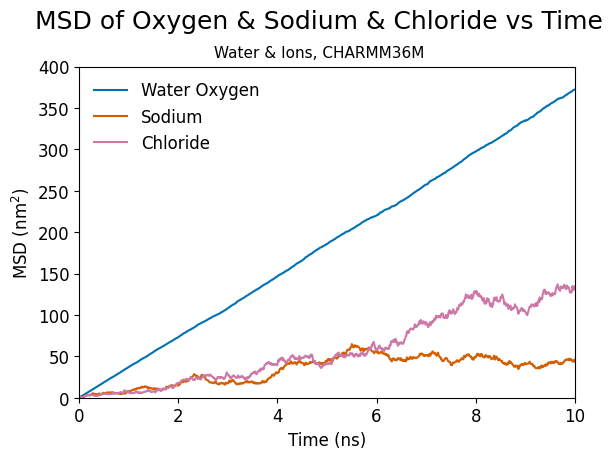

In [7]:
# figure 1: MSD vs Time
# plot the MSD of water oxygen atoms, colorblind-friendly 
fig=plt.figure(1)
plt.plot(traj.time/1000,msd_water_oxygen,color='#0072B2')
# plot the MSD of sodium ions, colorblind-friendly
plt.plot(traj.time/1000,msd_sodium_ions,color='#D55E00')
# plot the MSD of chloride ions, colorblind-friendly
plt.plot(traj.time/1000,msd_chloride_ions,color='#CC79A7')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('MSD (nm$^2$)',fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="MSD of Oxygen & Sodium & Chloride vs Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Water & Ions, CHARMM36M", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set limits for the axes
plt.xlim(0,10)
plt.ylim(0,400)
plt.yticks(np.arange(0,401,50))
# add a legend, fontsize = 12, frameon = False
plt.legend(['Water Oxygen','Sodium','Chloride'],fontsize=12,frameon=False)
# save figure as pdf in ../Figures
fname = '../Figures/fig.4-[Water-Ions]MSD_Oxygen_Sodium_Chloride.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

# next part is not for homework
# next part is not for homework
# next part is not for homework

In [8]:
# compute the RMSD of water hydrogen atoms, change rmsd to msd
water_hydrogen=traj.topology.select('(name == H1) or (name == H2)')
rmsd_water_hydrogen=md.rmsd(traj, traj, 0, atom_indices=water_hydrogen)
msd_water_hydrogen=rmsd_water_hydrogen**2
# compute the RMSD of all atoms, change rmsd to msd
all_atoms=traj.topology.select('all')
rmsd_all_atoms=md.rmsd(traj, traj, 0, atom_indices=all_atoms)
msd_all_atoms=rmsd_all_atoms**2

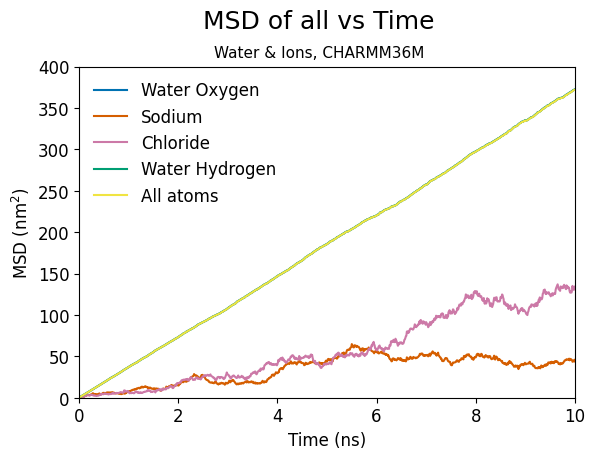

In [12]:
# figure 2: MSD of all vs Time
# plot the MSD of water oxygen atoms, colorblind-friendly 
fig=plt.figure(2)
plt.plot(traj.time/1000,msd_water_oxygen,color='#0072B2')
# plot the MSD of sodium ions, colorblind-friendly
plt.plot(traj.time/1000,msd_sodium_ions,color='#D55E00')
# plot the MSD of chloride ions, colorblind-friendly
plt.plot(traj.time/1000,msd_chloride_ions,color='#CC79A7')
# plot the MSD of water hydrogen atoms, colorblind-friendly
plt.plot(traj.time/1000,msd_water_hydrogen,color='#009E73')
# plot the MSD of all atoms, colorblind-friendly
plt.plot(traj.time/1000,msd_all_atoms,color='#F0E442')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('MSD (nm$^2$)',fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="MSD of all vs Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Water & Ions, CHARMM36M", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set limits for the axes
plt.xlim(0,10)
plt.ylim(0,400)
plt.yticks(np.arange(0,401,50))
# add a legend, fontsize = 12, frameon = False
plt.legend(['Water Oxygen','Sodium','Chloride','Water Hydrogen','All atoms'],fontsize=12,frameon=False)


(64.0, 169.0)

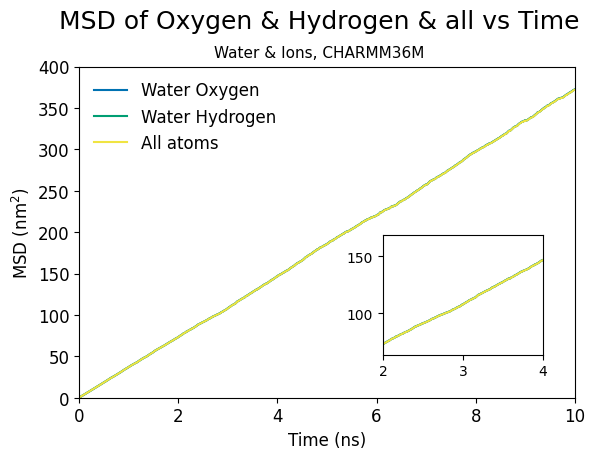

In [14]:
# figure 3: MSD of large-number atoms vs Time
fig=plt.figure(3)
# plot the MSD of water oxygen atoms, colorblind-friendly
plt.plot(traj.time/1000,msd_water_oxygen,color='#0072B2')
# plot the MSD of water hydrogen atoms, colorblind-friendly
plt.plot(traj.time/1000,msd_water_hydrogen,color='#009E73')
# plot the MSD of all atoms, colorblind-friendly
plt.plot(traj.time/1000,msd_all_atoms,color='#F0E442')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('MSD (nm$^2$)',fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="MSD of Oxygen & Hydrogen & all vs Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Water & Ions, CHARMM36M", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set limits for the axes
plt.xlim(0,10)
plt.ylim(0,400)
plt.yticks(np.arange(0,401,50))
# add a legend, fontsize = 12, frameon = False
plt.legend(['Water Oxygen','Water Hydrogen','All atoms'],fontsize=12,frameon=False)
# add small subplot to show the zoomed-in region, right bottom corner
ax = fig.add_axes([0.6, 0.2, 0.25, 0.25])
# move ax to the bottom right corner
ax.spines['right'].set_position(('axes', 1.0))
# plot the MSD of water oxygen atoms, colorblind-friendly
ax.plot(traj.time/1000,msd_water_oxygen,color='#0072B2')
# plot the MSD of water hydrogen atoms, colorblind-friendly
ax.plot(traj.time/1000,msd_water_hydrogen,color='#009E73')
# plot the MSD of all atoms, colorblind-friendly
ax.plot(traj.time/1000,msd_all_atoms,color='#F0E442')
# set limits for the axes
ax.set_xlim(2,4)
ax.set_ylim(64,169)
